# Практическая работа №5: Элементы регрессионного анализа. Выборочные прямые среднеквадратической регрессии. Корреляционные отношения

Выполнил студент гр. 1384 Степаненко Денис Владиславович.

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК-в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

Уравнения выборочных прямых среднеквадратической регрессии :

${\overline{y}}_x=\overline{y}+\overline{r}\frac{S_y}{S_x}\left(x-\overline{x}\right)$,

${\overline{x}}_y=\overline{x}+\overline{r}\frac{S_x}{S_y}(y-\overline{y})$

Оценка остаточной дисперсии:

$\sigma_x^2\left(1-r^2\right)$

Выборочное корелляционное отношение:

$\eta_{xy}=\frac{{\overline{\sigma}}_{{\overline{x}}_y}}{{\overline{\sigma}}_x}$




## Постановка задачи

Для заданной двумерной выборки
(
X
,
Y
)
 построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

## Пункт 1.
Отобразить двумерную выборку на графике.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
df = pd.read_csv("/content/drive/MyDrive/obesity_data.csv")
# data = np.array(df)
df

,Weight,NCP
0,53.699561,3.891994
1,111.004920,3.000000
2,60.000000,4.000000
3,42.000000,1.000000
4,74.000000,3.000000
...,...,...
90,80.000000,3.000000
91,102.784864,2.015675
92,51.588874,2.057935
93,75.000000,3.000000


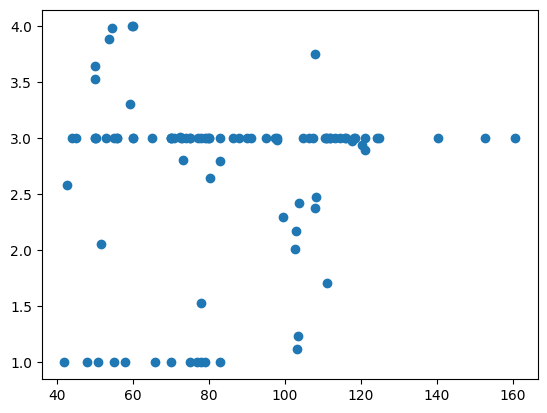

In [80]:
import matplotlib.pyplot as plt
plt.scatter(df.Weight, df.NCP)
plt.show()

### Пункт 2
Для заданной выборки построить уравнения средней квадратичной регрессии
x
 на
y
 и
y
 на
x
 соответственно. Построить полученные прямые на множестве выборки. Объяснить результаты.

Уравнение регрессии Y на X: Y = 2.42 + 0.00 * X
Уравнение регрессии X на Y: X = 75.29 + 3.54 * Y


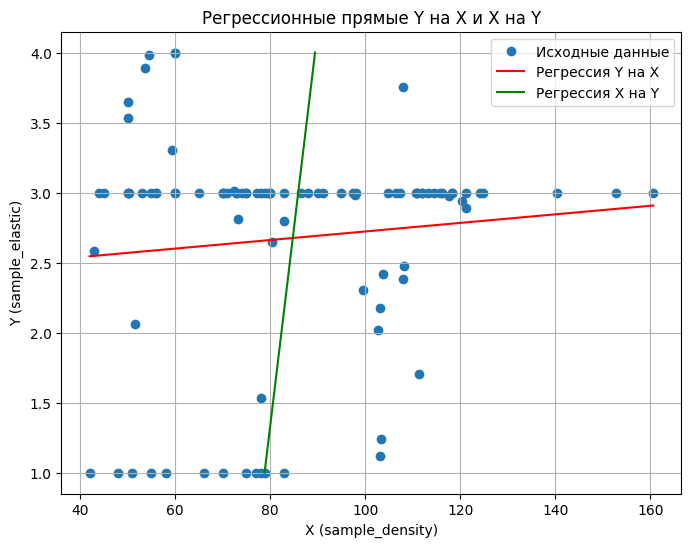

In [81]:
X = np.array(df.Weight)
Y = np.array(df.NCP)

mean_x = np.mean(X)
mean_y = np.mean(Y)
S_x = np.std(X, ddof=1)
S_y = np.std(Y, ddof=1)
r = np.corrcoef(X, Y)[0, 1]

b = r * S_y / S_x
a = mean_y - b * mean_x
x_values = np.linspace(min(X), max(X), 100)
y_reg = a + b * x_values

d = r * S_x / S_y
c = mean_x - d * mean_y
y_values = np.linspace(min(Y), max(Y), 100)
x_reg = c + d * y_values

print(f"Уравнение регрессии Y на X: Y = {a:.2f} + {b:.2f} * X")
print(f"Уравнение регрессии X на Y: X = {c:.2f} + {d:.2f} * Y")

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Исходные данные')
plt.plot(x_values, y_reg, color='red', label='Регрессия Y на X')
plt.plot(x_reg, y_values, color='green', label='Регрессия X на Y')
plt.title('Регрессионные прямые Y на X и X на Y')
plt.xlabel('X (sample_density)')
plt.ylabel('Y (sample_elastic)')
plt.grid(True)
plt.legend()
plt.show()

Построенные функции максимально уменьшают среднеквадартическую ошибку, но т.к. выбороыне даннные невозможно описать линейной функцией, на графике не значения не совпадают с графиком функции. Графики функций пересекаются в точке со средним значением по каждой выборке в абсциссе и ординате соотвественно.

### Пункт 3.
Составить корреляционную таблицу для нахождения выборочного корреляционного отношения. Убедиться, что неравенства $\eta_{xy} \geqslant |r_{xy}|$ и $\eta_{yx} \geqslant |r_{xy}|$ выполняются.

In [82]:
data = np.array(df)

k = round(1 + int(np.log2(len(df))))
bins1 = pd.cut(df["Weight"], bins=k, right=False, precision=6)
bins2 = pd.cut(df["NCP"], bins=k, right=False, precision=6)

contingency_table = pd.crosstab(bins2, bins1,  margins=True, margins_name="Total")

table = np.array(contingency_table)
intervals1 = bins1.cat.categories
intervals2 = bins2.cat.categories
weights_x = np.array([(interval.left + interval.right) / 2 for interval in intervals1])
weights_y = np.array([(interval.left + interval.right) / 2 for interval in intervals2])

n_y = table[:-1, -1]
print(n_y)
weighted_means_rows = []
for i in range(table.shape[0] - 1):
    row = np.array(table[i, :-1])
    weighted_mean = np.sum(row * weights_x) / n_y[i]
    weighted_means_rows.append(weighted_mean)

print("Условное выборочно среднее по строкам:")
for i, mean in enumerate(weighted_means_rows):
    print(f"{mean:.2f}")

n_x = table[-1, :-1]
print(n_x)
weighted_means_cols = []
for j in range(table.shape[1] - 1):
    col = table[:-1, j]
    weighted_mean = np.sum(col * weights_y) / n_x[j]
    weighted_means_cols.append(weighted_mean)

print("\nУсловное выборочно среднее по столбцам:")
for j, mean in enumerate(weighted_means_cols):
    print(f"{mean:.2f}")


contingency_table.rename(index={"Total": "$n_x$"}, columns={"Total": "$n_y$"}, inplace=True)
markdown_table = contingency_table.to_markdown()
print(markdown_table)

[14  2  3  6 62  2  6]
Условное выборочно среднее по строкам:
71.05
101.32
84.37
90.02
89.84
58.95
64.60
[20 20 18 16 18  1  2]

Условное выборочно среднее по столбцам:
2.59
2.78
2.45
2.55
2.86
2.93
2.93
| NCP                  |   [42.0, 58.948486) |   [58.948486, 75.896973) |   [75.896973, 92.845459) |   [92.845459, 109.793946) |   [109.793946, 126.742432) |   [126.742432, 143.690919) |   [143.690919, 160.758044) |   $n_y$ |
|:---------------------|--------------------:|-------------------------:|-------------------------:|--------------------------:|---------------------------:|---------------------------:|---------------------------:|--------:|
| [1.0, 1.428571)      |                   5 |                        3 |                        4 |                         2 |                          0 |                          0 |                          0 |      14 |
| [1.428571, 1.857143) |                   0 |                        0 |                        1 |                  

Таблица 1

| NCP                  |   [42.0, 58.948486) |   [58.948486, 75.896973) |   [75.896973, 92.845459) |   [92.845459, 109.793946) |   [109.793946, 126.742432) |   [126.742432, 143.690919) |   [143.690919, 160.758044) |   $n_y$ | $\bar x_y$ |
|:---------------------|--------------------:|-------------------------:|-------------------------:|--------------------------:|---------------------------:|---------------------------:|---------------------------:|--------:|----:|
| [1.0, 1.428571)      |                   5 |                        3 |                        4 |                         2 |                          0 |                          0 |                          0 |      14 | 71.05|
| [1.428571, 1.857143) |                   0 |                        0 |                        1 |                         0 |                          1 |                          0 |                          0 |       2 |101.32|
| [1.857143, 2.285714) |                   1 |                        0 |                        0 |                         2 |                          0 |                          0 |                          0 |       3 |84.37|
| [2.285714, 2.714286) |                   1 |                        0 |                        1 |                         4 |                          0 |                          0 |                          0 |       6 |90.02|
| [2.714286, 3.142857) |                   9 |                       14 |                       12 |                         7 |                         17 |                          1 |                          2 |      62 |89.84|
| [3.142857, 3.571429) |                   1 |                        1 |                        0 |                         0 |                          0 |                          0 |                          0 |       2 |58.95|
| [3.571429, 4.003)    |                   3 |                        2 |                        0 |                         1 |                          0 |                          0 |                          0 |       6 |64.60|
| $n_x$                |                  20 |                       20 |                       18 |                        16 |                         18 |                          1 |                          2 |      95 |
| $\bar y_x$ | 2.59 | 2.78 | 2.45 | 2.55 |2.86 |2.93 | 2.93|

In [83]:
x_bar_y = weighted_means_rows
y_bar_x = weighted_means_cols

n_total = np.sum(n_y)

mean_y = np.sum(n_y * x_bar_y) / n_total
var_y = np.sum(n_y * (x_bar_y - mean_y) ** 2) / n_total

mean_x = np.sum(n_x * y_bar_x) / n_total
var_x = np.sum(n_x * (y_bar_x - mean_x) ** 2) / n_total

y_pred = y_bar_x
var_y_pred = np.sum(n_x * (y_pred - mean_y) ** 2) / n_total

x_pred = x_bar_y
var_x_pred = np.sum(n_y * (x_pred - mean_x) ** 2) / n_total

eta_xy = np.sqrt(var_y_pred / var_y)
eta_yx = np.sqrt(var_x_pred / var_x)

cov_xy = np.sum(n_x * (y_bar_x - mean_x) * (x_bar_y - mean_y)) / n_total
r_xy = cov_xy / np.sqrt(var_x * var_y)

# 7. Проверка неравенств
print(f"η_xy: {eta_xy:.4f}")
print(f"η_yx: {eta_yx:.4f}")
print(f"r_xy: {r_xy:.4f}")

print("\nПроверка неравенств:")
print(f"η_xy >= |r_xy|: {eta_xy >= abs(r_xy)}")
print(f"η_yx >= |r_xy|: {eta_yx >= abs(r_xy)}")

η_xy: 8.5877
η_yx: 536.3928
r_xy: 0.3753

Проверка неравенств:
η_xy >= |r_xy|: True
η_yx >= |r_xy|: True


ок!

### Пункт 4.
Для заданной выборки построить корреляционную кривую параболического вида
$y = \beta_0 + \beta_1x + \beta_2x^2$, сделать выводы.

Коэффициенты параболической регрессии:
β_0 = -0.0097
β_1 = 1.7905
β_2 = 11.0531


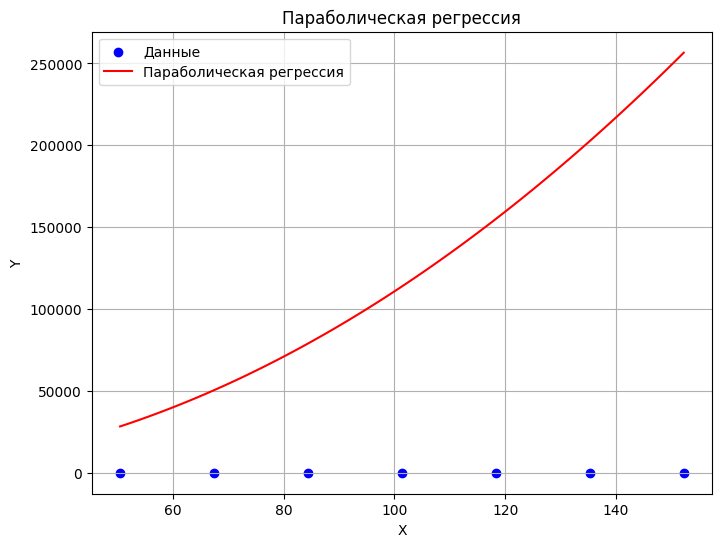

In [86]:
x_values = weights_x
y_values = weights_y

sum_x4 = np.sum(n_x * x_values ** 4)
sum_x3 = np.sum(n_x * x_values ** 3)
sum_x2 = np.sum(n_x * x_values ** 2)
sum_x = np.sum(n_x * x_values)

sum_yx2 = np.sum(n_x * weighted_means_rows * x_values ** 2)
sum_yx = np.sum(n_x * weighted_means_rows * x_values)
sum_y = np.sum(n_x * weighted_means_rows)

A = np.array([
    [sum_x4, sum_x3, sum_x2],
    [sum_x3, sum_x2, sum_x],
    [sum_x2, sum_x, np.sum(n_x)]
])
B = np.array([sum_yx2, sum_yx, sum_y])

# Решение системы
beta = np.linalg.solve(A, B)
beta_0, beta_1, beta_2 = beta

print(f"Коэффициенты параболической регрессии:")
print(f"β_0 = {beta_0:.4f}")
print(f"β_1 = {beta_1:.4f}")
print(f"β_2 = {beta_2:.4f}")

x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = beta_0 + beta_1 * x_fit + beta_2 * x_fit ** 2

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Данные')
plt.plot(x_fit, y_fit, color='red', label='Параболическая регрессия')
plt.title('Параболическая регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()



Данная модель абсолютно не походит под описание выборовных данных, т.к. график сильно удален от реальных значений выборки.

### Пункт 5
Для заданной выборки построить корреляционную кривую в зависимости от номера варианта и сделать выводы:
$ y = \beta_0\exp(\beta_1x)$ - показательная функция


Коэффициенты показательной регрессии:
β_0 = 2.0515
β_1 = 0.0024


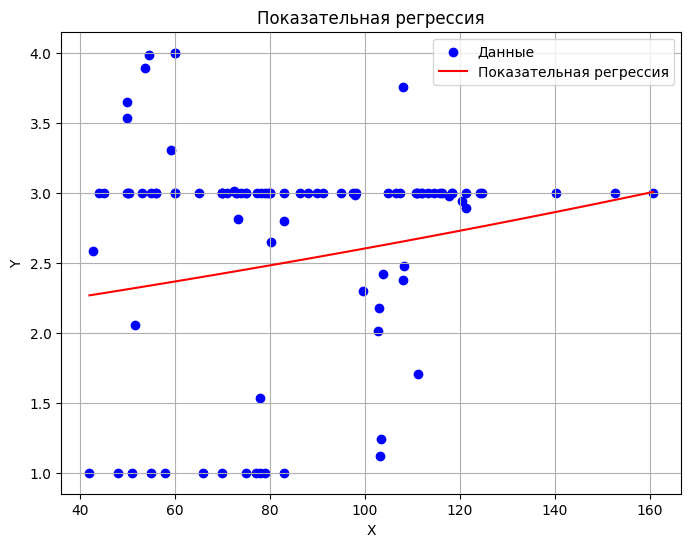

In [87]:
x_values = X
y_values = Y

z_values = np.log(y_values)  # z = ln(y)

n = len(x_values)
sum_x = np.sum(x_values)
sum_z = np.sum(z_values)
sum_xz = np.sum(x_values * z_values)
sum_x2 = np.sum(x_values ** 2)

A = np.array([
    [n, sum_x],
    [sum_x, sum_x2]
])
B = np.array([sum_z, sum_xz])


a, beta_1 = np.linalg.solve(A, B)
beta_0 = np.exp(a)

print(f"Коэффициенты показательной регрессии:")
print(f"β_0 = {beta_0:.4f}")
print(f"β_1 = {beta_1:.4f}")


x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = beta_0 * np.exp(beta_1 * x_fit)
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Данные')
plt.plot(x_fit, y_fit, color='red', label='Показательная регрессия')
plt.title('Показательная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

Так как данные двойной выборки распроделены не по показательной функции, она график выглядит как график линейной функции.

## Выводы

В ходе выполнения практической работы были использованы, рассчитаны и визуализированы методы регрессионного анализа, включая построение линейной, параболической и показательной регрессий. Линейная регрессия позволила оценить прямую зависимость между переменными, однако слабая корреляция и значительные отклонения данных от регрессионных прямых указали на недостаточность линейной модели для описания зависимости. Параболическая регрессия, учитывающая нелинейность, результаты еще хуже. Показательная регрессия, тоже оказалась неприменимой, так как данные не имеют экспоненциального характера, что привело к графику, близкому к прямой линии. А также в процессе работы были получены знания о методах наименьших квадратов (МНК) и их применении для построения регрессионных моделей.
